**IMPORT LIBRARIES**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data=pd.read_csv("/content/drive/MyDrive/ML_DataSets/Cheapestelectriccars-EVDatabase 2023.csv")

In [28]:
data.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN


In [29]:
data.tail()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0 sec,180 km/h,470 km,164 Wh/km,700 km/h,Rear Wheel Drive,5,"€55,000","£53,000"
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0 sec,180 km/h,520 km,165 Wh/km,800 km/h,Rear Wheel Drive,5,"€60,000","£56,000"
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4 sec,180 km/h,510 km,184 Wh/km,760 km/h,Rear Wheel Drive,5,"€60,000","£55,000"
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8 sec,200 km/h,475 km,198 Wh/km,710 km/h,All Wheel Drive,5,"€65,000","£60,000"
308,Maserati Grecale Folgore,95 kWh useable battery Expected from ...,4.1 sec,220 km/h,405 km,235 Wh/km,440 km/h,All Wheel Drive,5,NaN,"£135,000"


In [30]:
data.info

<bound method DataFrame.info of                                    Name  \
0             Lucid Air Dream Edition P   
1                Porsche Taycan Turbo S   
2                     Audi e-tron GT RS   
3                 Renault Zoe ZE50 R110   
4                     Audi Q4 e-tron 35   
..                                  ...   
304                 Volkswagen ID.7 Pro   
305               Volkswagen ID.7 Pro S   
306  Polestar 4 Long Range Single Motor   
307    Polestar 4 Long Range Dual Motor   
308            Maserati Grecale Folgore   

                                              Subtitle Acceleration  TopSpeed  \
0    118 kWh useable battery          Available sin...      2.7 sec  270 km/h   
1    83.7 kWh useable battery          Available si...      2.8 sec  260 km/h   
2    85 kWh useable battery          Available sinc...      3.3 sec  250 km/h   
3    52 kWh useable battery          Available sinc...     11.4 sec  135 km/h   
4    52 kWh useable battery          Available

In [31]:
data.describe()

,NumberofSeats
count,309.000000
mean,5.284790
std,0.978567
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,7.000000


In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
data.shape

(309, 11)

In [34]:
data.columns

Index(['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK'],
      dtype='object')

In [35]:
selected_columns=['Name','Subtitle','Acceleration','TopSpeed','Range','Efficiency','FastChargeSpeed','Drive','NumberofSeats']
for i, column in enumerate(selected_columns):
  unique_values = data[column].nunique()
  print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'Name': 308
Unique values for column 'Subtitle': 187
Unique values for column 'Acceleration': 84
Unique values for column 'TopSpeed': 36
Unique values for column 'Range': 80
Unique values for column 'Efficiency': 89
Unique values for column 'FastChargeSpeed': 91
Unique values for column 'Drive': 3
Unique values for column 'NumberofSeats': 4


In [36]:
data.dtypes

Name               object
Subtitle           object
Acceleration       object
TopSpeed           object
Range              object
Efficiency         object
FastChargeSpeed    object
Drive              object
NumberofSeats       int64
PriceinGermany     object
PriceinUK          object
dtype: object

**MISSING VALUES**

In [37]:
data.isnull().sum()

Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      27
PriceinUK          111
dtype: int64

**VISUALISING THROUGH GRAPHS**

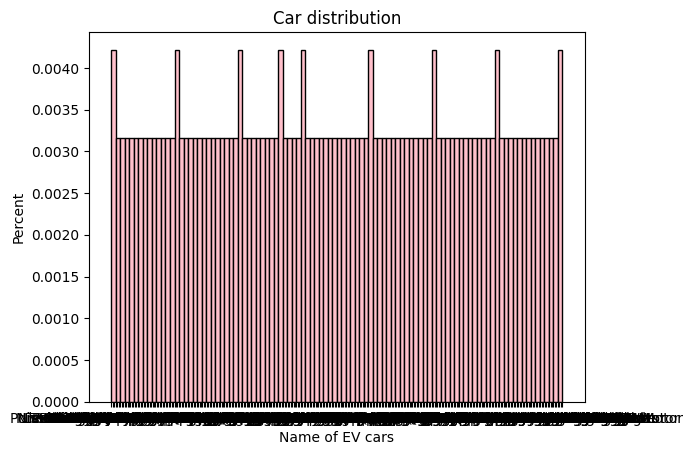

In [38]:
import matplotlib.pyplot as plt

plt.hist(data['Name'], density=True, bins=100, color='pink',edgecolor='black')
plt.xlabel('Name of EV cars')
plt.ylabel('Percent')
plt.title('Car distribution')
plt.show()

In [39]:
encoded_data = pd.get_dummies(data)

In [42]:
correlation_matrix = encoded_data.corr()
correlation_matrix

,NumberofSeats,Name_Abarth 500e Scorpionissima,Name_Aiways U5,Name_Aiways U6,Name_Audi Q4 Sportback e-tron 35,Name_Audi Q4 Sportback e-tron 40,Name_Audi Q4 Sportback e-tron 45 quattro,Name_Audi Q4 Sportback e-tron 50 quattro,Name_Audi Q4 e-tron 35,Name_Audi Q4 e-tron 40,...,"PriceinUK_£86,500","PriceinUK_£87,500","PriceinUK_£89,500","PriceinUK_£90,406","PriceinUK_£90,560","PriceinUK_£91,000","PriceinUK_£91,406","PriceinUK_£96,255","PriceinUK_£98,295","PriceinUK_£99,785"
NumberofSeats,1.000000,-0.074932,-0.016610,-0.016610,-0.016610,-0.016610,-0.016610,-0.016610,-0.016610,-0.016610,...,-0.074932,-0.074932,-0.016610,-0.074932,-0.016610,-0.074932,-0.074932,0.100036,-0.016610,-0.016610
Name_Abarth 500e Scorpionissima,-0.074932,1.000000,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,...,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247
Name_Aiways U5,-0.016610,-0.003247,1.000000,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,...,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247
Name_Aiways U6,-0.016610,-0.003247,-0.003247,1.000000,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,...,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247
Name_Audi Q4 Sportback e-tron 35,-0.016610,-0.003247,-0.003247,-0.003247,1.000000,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,...,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"PriceinUK_£91,000",-0.074932,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,...,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,1.000000,-0.003247,-0.003247,-0.003247,-0.003247
"PriceinUK_£91,406",-0.074932,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,...,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,1.000000,-0.003247,-0.003247,-0.003247
"PriceinUK_£96,255",0.100036,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,...,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,1.000000,-0.003247,-0.003247
"PriceinUK_£98,295",-0.016610,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,...,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,-0.003247,1.000000,-0.003247


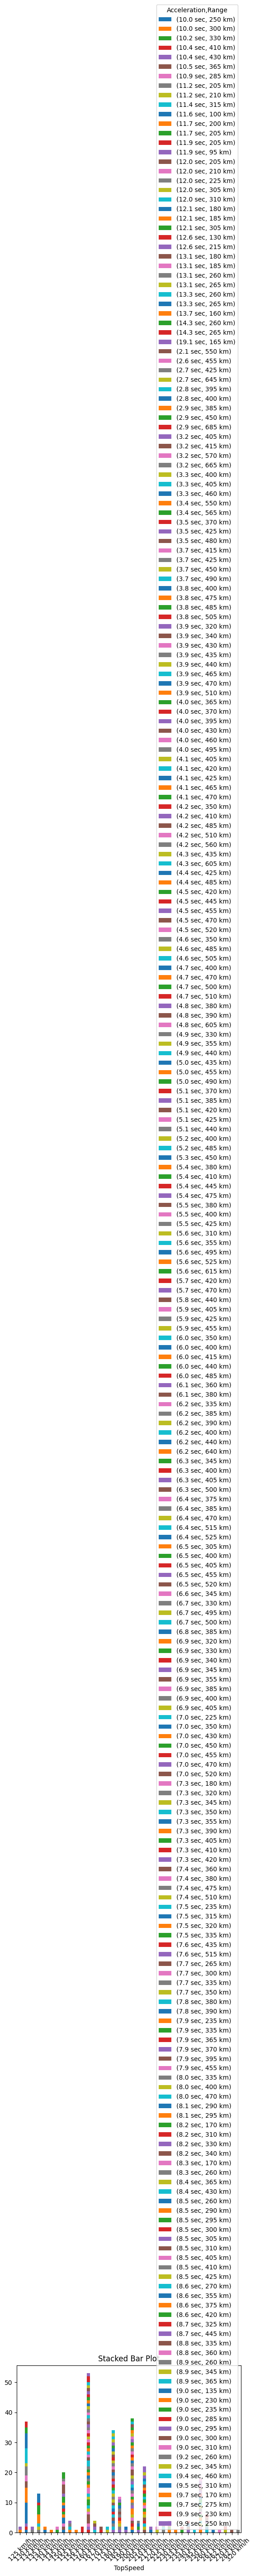

In [46]:
cross_table = pd.crosstab(index=data['TopSpeed'], columns=[data['Acceleration'], data['Range']])
cross_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot')
plt.xticks(rotation=45)
plt.show()

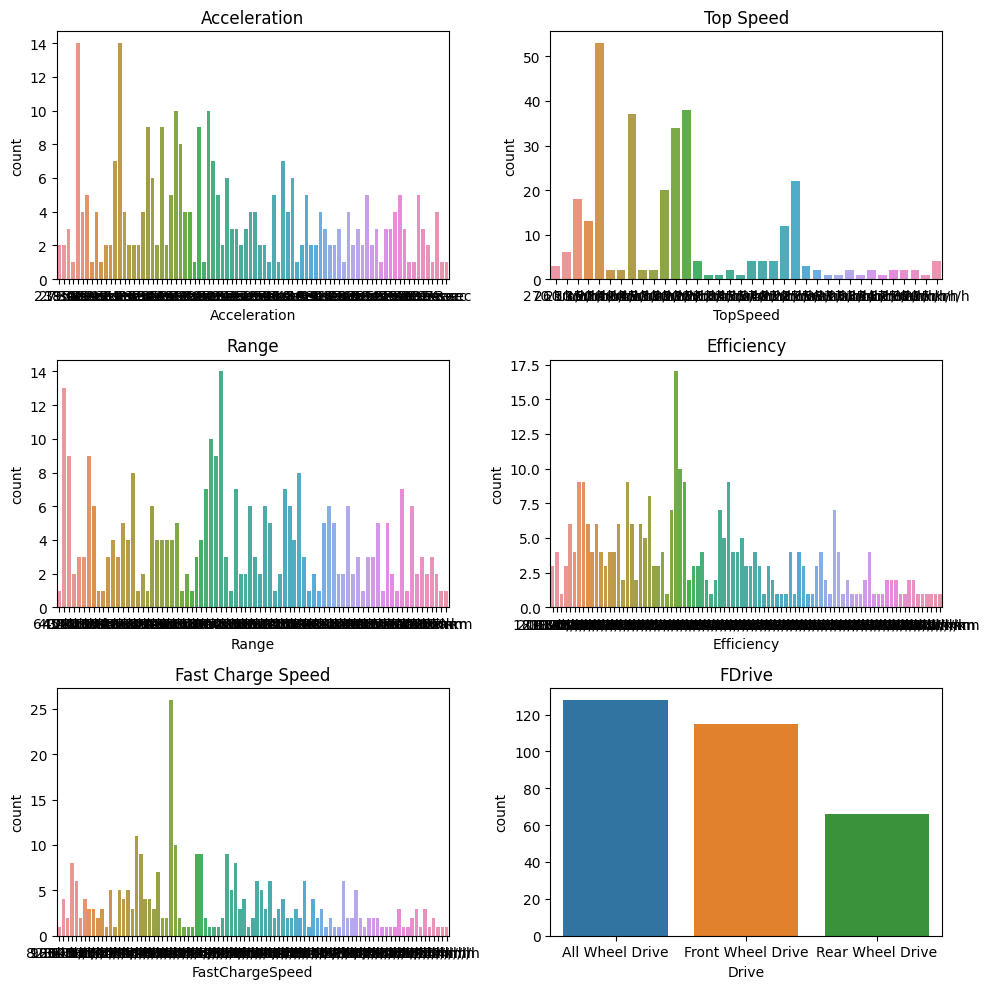

In [53]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
sns.countplot(x='Acceleration', data=data)
plt.title('Acceleration')

plt.subplot(3, 2, 2)
sns.countplot(x='TopSpeed', data=data)
plt.title('Top Speed')

plt.subplot(3, 2, 3)
sns.countplot(x='Range', data=data)
plt.title('Range')

plt.subplot(3, 2, 4)
sns.countplot(x='Efficiency', data=data)
plt.title('Efficiency')

plt.subplot(3, 2, 5)
sns.countplot(x='FastChargeSpeed', data=data)
plt.title('Fast Charge Speed')

plt.subplot(3, 2, 6)
sns.countplot(x='Drive', data=data)
plt.title('FDrive')

plt.tight_layout()
plt.show()

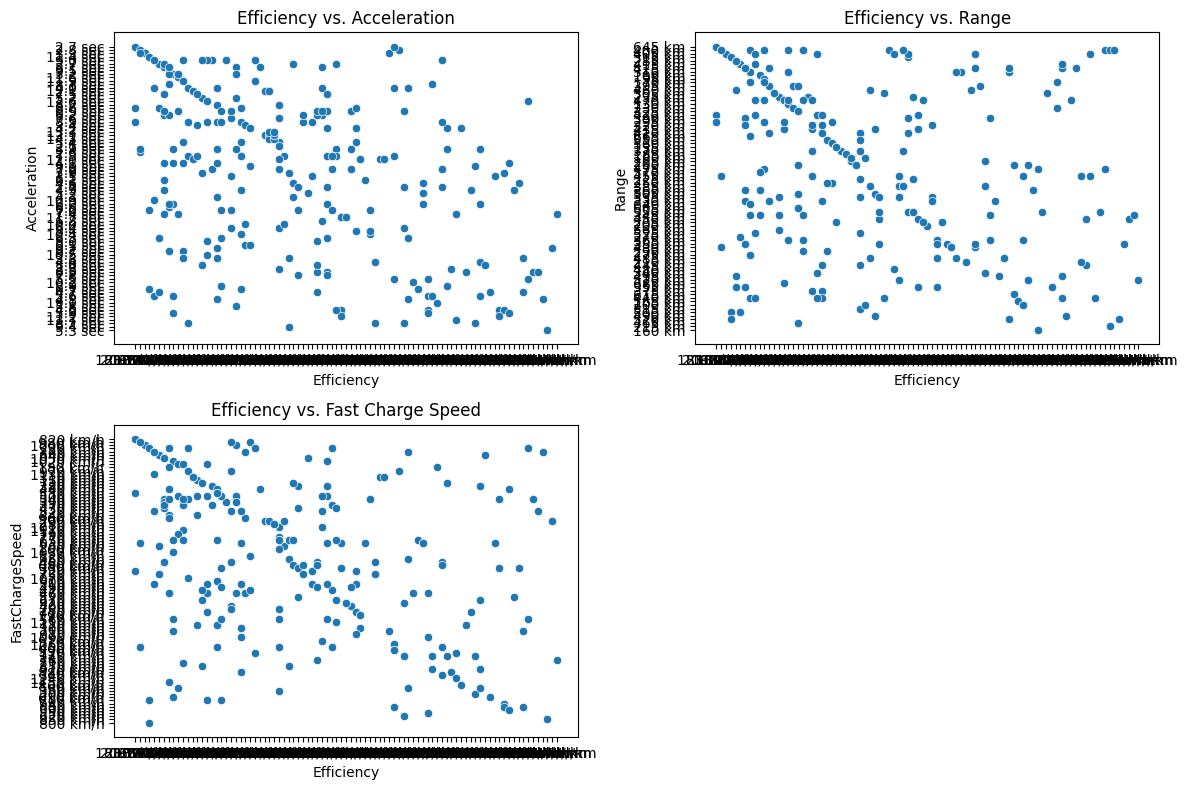

In [54]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Efficiency', y='Acceleration', data=data)
plt.title('Efficiency vs. Acceleration')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Efficiency', y='Range', data=data)
plt.title('Efficiency vs. Range')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Efficiency', y='FastChargeSpeed', data=data)
plt.title('Efficiency vs. Fast Charge Speed')

plt.tight_layout()
plt.show()